In [1]:
from sklearn import datasets
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
data['especie'] = [iris.target_names[i] for i in iris.target]

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data['especie'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: especie, dtype: int64

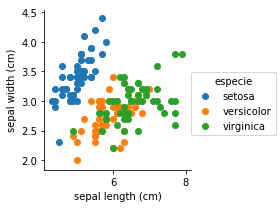

In [7]:
sb.FacetGrid(data, hue='especie').map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)').add_legend();

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# map os nomes das espécies na notação hard-one

s = np.asarray([1, 0, 0], dtype=np.float32)
ve = np.asarray([0, 1, 0], dtype=np.float32)
vi = np.asarray([0, 0, 1], dtype=np.float32)
data['especie'] = data['especie'].map({'setosa':s, 'versicolor':ve, 'virginica':vi}) 

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,5.1,3.5,1.4,0.2,"[1.0, 0.0, 0.0]"
1,4.9,3.0,1.4,0.2,"[1.0, 0.0, 0.0]"
2,4.7,3.2,1.3,0.2,"[1.0, 0.0, 0.0]"
3,4.6,3.1,1.5,0.2,"[1.0, 0.0, 0.0]"
4,5.0,3.6,1.4,0.2,"[1.0, 0.0, 0.0]"


In [11]:
# Os dados estão ordenados bnitinhos mas como queremos 
# extrair uma amostra de treino e teste, é preciso 
# "embaralhar" esses dados para que quando extrair as amostras
# desejadas, elas possam ser aleatórias e assim probabilísticas

data = data.iloc[np.random.permutation(len(data))]

In [12]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
13,4.3,3.0,1.1,0.1,"[1.0, 0.0, 0.0]"
63,6.1,2.9,4.7,1.4,"[0.0, 1.0, 0.0]"
24,4.8,3.4,1.9,0.2,"[1.0, 0.0, 0.0]"
64,5.6,2.9,3.6,1.3,"[0.0, 1.0, 0.0]"
147,6.5,3.0,5.2,2.0,"[0.0, 0.0, 1.0]"


In [13]:
# vamos só renomear o index em ordem crescete
data = data.reset_index(drop=True)

In [14]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
145,4.3,3.0,1.1,0.1,"[1.0, 0.0, 0.0]"
146,6.1,2.9,4.7,1.4,"[0.0, 1.0, 0.0]"
147,4.8,3.4,1.9,0.2,"[1.0, 0.0, 0.0]"
148,5.6,2.9,3.6,1.3,"[0.0, 1.0, 0.0]"
149,6.5,3.0,5.2,2.0,"[0.0, 0.0, 1.0]"


In [15]:
data.columns[:4]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [16]:
# amostra de treino
x_input = data.ix[0:105, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
temp = data['especie']
y_input = temp[0:106]

/home/cloves/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [17]:
#amostra de teste

x_test = data.ix[106:149, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y_test = temp[106:150]

In [18]:
# criando nossos placeholders e variáveis
# nosso input tem 4 parâmetros e nosso output
# são 3 classes

x = tf.placeholder(tf.float32, shape=[None, 4])
y_ = tf.placeholder(tf.float32, shape=[None, 3])

# nossa matriz de pesos W
# e o vetor de viés b.

W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

In [19]:
# como são múltiplas classes, no nosso caso 3,
# podemos usar a função de ativação SoftMax

y = tf.nn.softmax(tf.matmul(x, W) + b)

In [20]:
# a função de custo usada no caso do SoftMax
# é a cross-entropy

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices=[1]))

In [21]:
# vamos definir nosso otimizador da função de custo
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)

# calculando a acurácia do nosso modelo
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
# iniciado nossa sessão
sess = tf.InteractiveSession()
# inicializando todas as variáveis que definimos anteriormente
init = tf.initialize_all_variables()
sess.run(init)
# numero de iterações
epoch = 2000

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [24]:
for step in range(epoch):
    _, c = sess.run([train_step, cross_entropy], feed_dict={x: x_input, y_: [t for t in y_input.as_matrix()]})
    if step%500==0:
        print (c)

1.0986121
0.1547668
0.093943566
0.073108315


In [29]:
# vamos fazer um teste aleatório para
# ver se nosso modelo consegue acertar 
# a espécie da flor

a = data.ix[130, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
b = a.reshape(1, 4)
largest = sess.run(tf.arg_max(y, 1), feed_dict={x:b})[0]
if largest == 0:
    print('setosa')
elif largest == 1:
    print('versicolor')
else:
    print('virginica')

virginica


/home/cloves/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [30]:
# Vamos ver a acurácia do modelo

r = sess.run(accuracy, feed_dict={x: x_input, y_: [t for t in y_input.as_matrix()]})
print(r)

0.9811321
